In [1]:
from dasquakes import *
import datetime
import numpy as np

# 1. Choose the following parameters to select data to examine

In [2]:
cable='seadasn'
record_length = 30 #minutes
t0 = datetime.datetime(2022, 11, 8, 0, 15, 0)

# 2. Run the functions to return the data

In [3]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [4]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 180000, Number of channels: 4555
Nyquist Frequency: 50.0 Hz, cable length: 29065.238805136032 m


# 4. Make a simple plot of the data
If the data is too big, this wont run!

In [5]:
# import matplotlib.pyplot as plt
# plt.subplots(figsize=(10,10))
# plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
# plt.xlabel('Channel Number')
# plt.ylabel('Time Step')
# plt.show()

# 5. Window and downsample the data

In [13]:
chan_min = 75
chan_max = 200
skip = 5 # keep every "skip" samples in time
data_windowed = data[::skip,0:chan_max]
dates_windowed = dates[::skip]
fs_new = attrs['MaximumFrequency']*2/skip

In [7]:
import matplotlib.dates as mdates
x_lims = mdates.date2num(dates_windowed)
date_format = mdates.DateFormatter('%H:%M:%S')

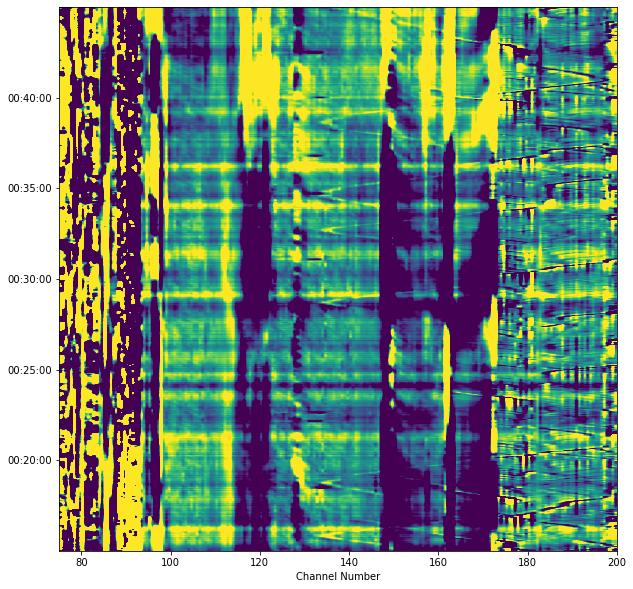

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,10))
plt.imshow(data_windowed,aspect='auto',vmin=-1,vmax=1,extent=[chan_min,chan_max,x_lims[0],x_lims[-1]])
plt.xlabel('Channel Number')
ax.yaxis.set_major_formatter(date_format)
ax.yaxis_date()
plt.show()

# 6. Filter, keeping in mind that we changed the sampling rate by downsampling

In [19]:
from scipy.signal import butter, filtfilt
b,a = butter(2,[0.1,4],'bandpass',fs=fs_new)
data_filt = filtfilt(b,a,data_windowed,axis=0)

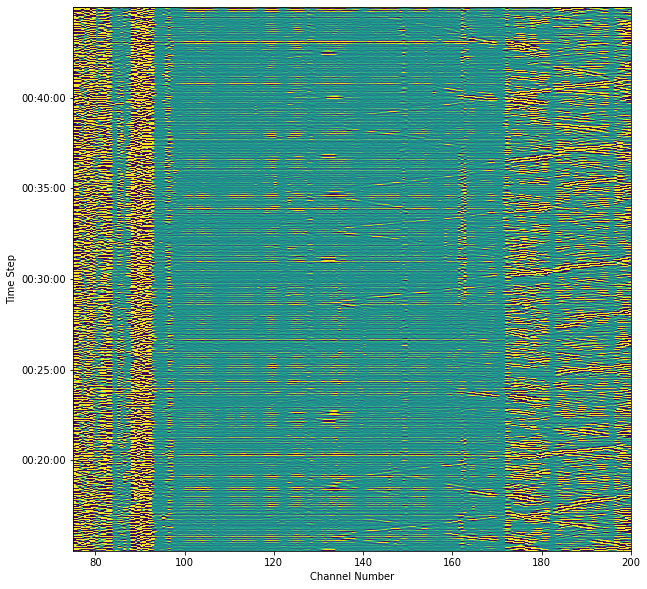

In [25]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
plt.imshow(data_filt,aspect='auto',vmin=-0.1,vmax=0.1,extent=[chan_min,chan_max,x_lims[0],x_lims[-1]])
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([75,200])
ax.yaxis.set_major_formatter(date_format)
ax.yaxis_date()
# plt.ylim([7750,8500])
plt.show()

In [ ]:
plt.plot(dates,data_windowed[:,150])